## APS2 - TRANSFERÊNCIA DE CALOR E MECÂNICA DOS SÓLIDOS
Grupo: Fernando Fincatti, Gabriela Moreno, Lais Nascimento, Theo Barbara;

---

### Importando as bibliotecas
---

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

### Declarando varíaveis
---

In [2]:
n = 2              #nº do grupo
k = 1              #m^2/s
alpha = 1          #m/s
T = 3              #s
Q = 100            #kg/ms
lx = 30            #m
ly = 30            #m
a = int(n/1.4)     #xxx
b = int(60/(n+5))  #xxx
tempo = T*10       #s
delta_t = 0.05     #s
delta_x = 0.5      #m
delta_y = delta_x  #m

In [3]:
#teste de convergência
print("Satisfaz condição de convergência: {0}".format((delta_t/delta_x**2) < (1/(4*k))))

Satisfaz condição de convergência: True


In [4]:
#número de nós em x
dimensao_x = int((lx/delta_x)) + 1

#número de nós em y
dimensao_y = int((ly/delta_y)) + 1

#steps no tempo
dimensao_z = int(tempo/delta_t) + 1

print("Dimensão x: {0}\nDimensão y: {1}\nDimensão z: {2}".format(dimensao_x,dimensao_y,dimensao_z))

Dimensão x: 61
Dimensão y: 61
Dimensão z: 601


## Funções de auxílio
---

In [5]:
def equacao_concentracao(x, y, c_mais_i_ant, c_menos_i_ant, c_mais_j_ant, c_menos_j_ant, c_ij_ant, t):
    
    #calcula o primeiro termo
    primeiro_termo = -alpha*(c_mais_i_ant - c_menos_i_ant)/(2*delta_x)
    
    #calcula o segundo termo
    segundo_termo = alpha*sin( (pi*x)/5 )*(c_mais_j_ant - c_menos_j_ant)/(2*delta_y)
    
    #calcula o terceiro termo
    terceiro_termo = k*(c_mais_i_ant - 2*c_ij_ant + c_menos_i_ant)/(delta_x**2)
    
    #calcula o quarto termo
    quarto_termo = k*(c_mais_j_ant - 2*c_ij_ant + c_menos_j_ant)/(delta_y**2)
    
    # Para a posição (a,b) para tempos menores de 3 segundos tem derramamento Q. !=0
    if x == a*2 and y == b*2 and t < T/delta_t:
        quinto_termo = Q/(delta_x*delta_y)
    
    # Se não obdece essas condições tem que desconsiderar o quinto termo que colocamos na função?
    else:
        quinto_termo = 0
    
    #calcula a resposta final
    resposta = delta_t*(primeiro_termo + segundo_termo + terceiro_termo + quarto_termo + quinto_termo) + c_ij_ant
    
    return resposta

In [6]:
def calculo (rio):
    tempo_atual = 1  #tempo
    i = 1            #colunas
    j = 1            #linhas

    while(tempo_atual < dimensao_z):

        i = 1 #reinicia as colunas

        while(i < dimensao_x-1):

            j = 1 #reinicia as linhas

            while(j < dimensao_y-1):

                #calcula dispersão do poluente
                rio[j, i, tempo_atual] = equacao_concentracao(j, i, rio[j, i+1, tempo_atual-1], rio[j, i-1, tempo_atual-1], rio[j+1, i, tempo_atual-1], rio[j-1, i, tempo_atual-1], rio[j, i, tempo_atual-1], tempo_atual)
    
                #primeira condição de contorno
                rio[j, 0, tempo_atual] = rio[j, 1, tempo_atual]

                #segunda condição de contorno
                rio[j, dimensao_x-1, :] = rio[j, dimensao_x-2, tempo_atual]
                
                #terceira condição de contorno
                rio[0, i, tempo_atual] = rio[1, i, tempo_atual]

                #quarta condição de contorno
                rio[dimensao_y-1, i, tempo_atual] = rio[dimensao_y-2, i, tempo_atual]
                
                if(rio[j,i,tempo_atual] < 0):
                    rio[j,i,tempo_atual] = 0
                
                j += 1
            i += 1
        tempo_atual += 1
    

## Inicializando a placa
---

In [7]:
#inicializa as condições do rio
rio = np.zeros((dimensao_y, dimensao_x, dimensao_z))

In [8]:
rio;

## Calculando a temperatura
---

In [9]:
calculo(rio)

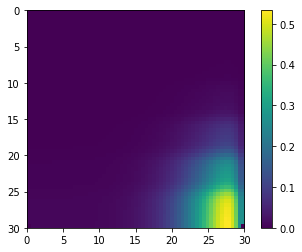

In [10]:
# Adicionar os seguintes parâmetros para limitar a escala do gráfico -> vmin=0, vmax=1
plt.imshow(rio[:,:,dimensao_z-1], extent=(0,lx,0,ly))
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

### Questão 4
---


In [11]:
ks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1, 1.1, 1.2]

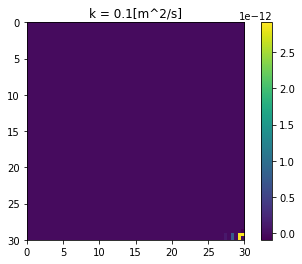

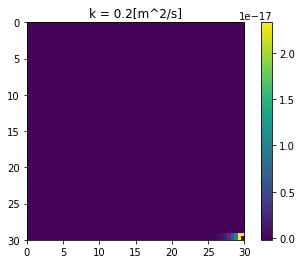

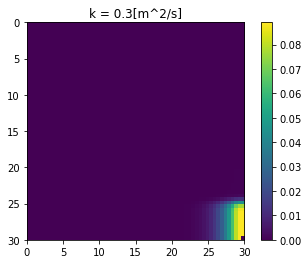

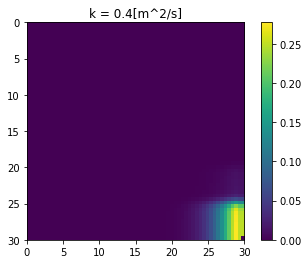

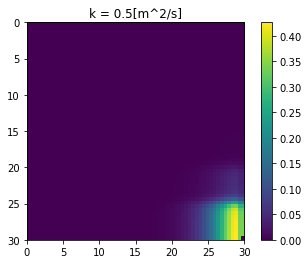

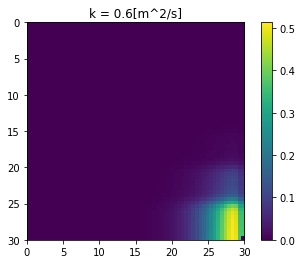

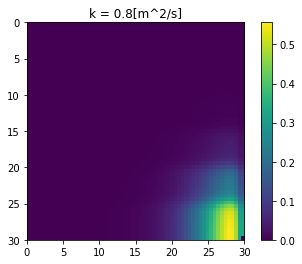

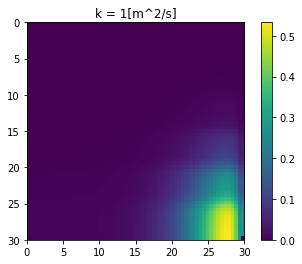

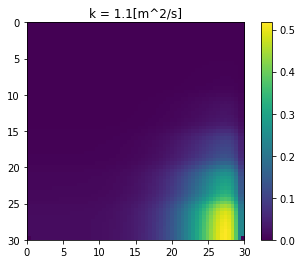

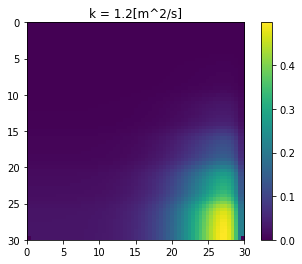

In [12]:
for k in ks:
    
    #inicializa as condições 
    k_menor = np.zeros((dimensao_y, dimensao_x, dimensao_z))
    
    calculo(k_menor)
    
    plt.imshow(k_menor[:,:,dimensao_z-1], extent=(0,lx,0,ly))
    plt.title("k = {0}[m^2/s]".format(k))
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.show()

Ao observar as imagens acima, que foram contruídas com o cáculo da difusão de um poluente em um rio com correnteza com um valores de  coeficiente de difusão K diferentes do que foi usado anteriormente. Percebemos que, para valores de k menores o transporte desse poluente para o restante do rio também é menor, ficando mais concentrado na região em que houve o derramamento. Já para valores de K maiores, é possível notar que há uma difusão maior, o poluente já não está mais com uma contração tão alta em apenas um determinado ponto, grande parte do rio já está contaminado.

### Questão 5
---

In [13]:
ts = [0, 2, 4, 6, 8, 10]

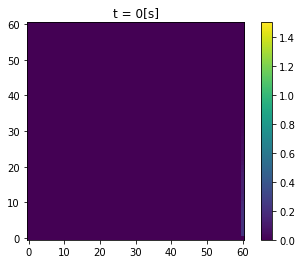

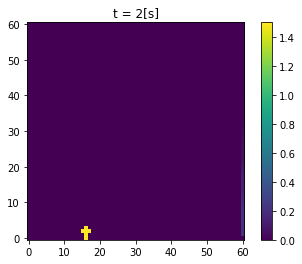

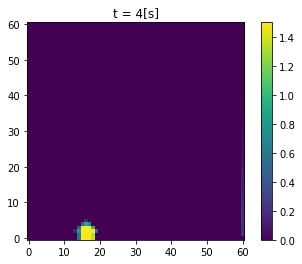

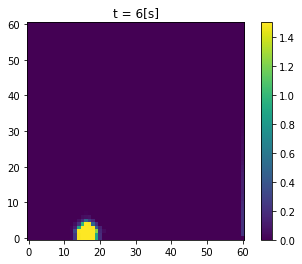

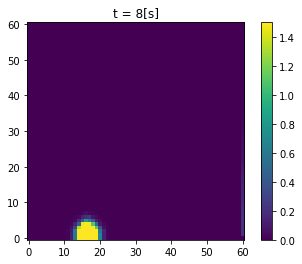

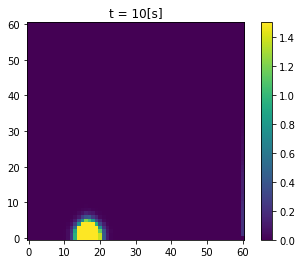

In [14]:
for t in ts:
    
    plt.imshow(k_menor[:,:,t], vmin=0,vmax=1.5)
    plt.title("t = {0}[s]".format(round(t, 2)))
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.show()

Como apresentado nas imagens acima, podemos dizer que a primeira fronteira a ser atingida pelo poluente, ou seja, com concentração maior que 0, é a borda inferior. Isso pode ser justificado pelo fato de que o ponto de derramamento do poluente p(a,b) está muito próximo da borda inferior, sendo a, b, 1 e 8, respectivamente. 